In [1]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\X\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [2]:
%pip install pandas numpy matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\X\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from visualizer.main import Visualizer, Plot
from tests.test3 import Test

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [34]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [35]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [36]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [37]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

In [38]:
polygon = [(np.float32(0.5645161), np.float32(-0.1233871)), (np.float32(0.2701613), np.float32(0.118548386)), (np.float32(0.5967742), np.float32(0.41290322)), (np.float32(-0.38709676), np.float32(0.62258065)), (np.float32(-0.3830645), np.float32(0.16693549)), (np.float32(-0.6814516), np.float32(-0.38548386)), (np.float32(-0.24596775), np.float32(-0.6314516)), (np.float32(0.29435483), np.float32(-0.3653226))]# [(0, 0), (2, 1), (1, 2), (3, 3), (0, 4), (-1, 2), (-2, 1)]

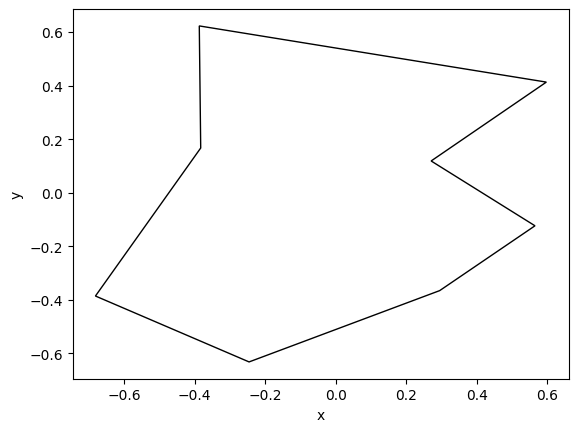

In [39]:
draw_polygon(polygon)

Do tego celu wygeneruj wielokąt.

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [40]:
def get_max_index(points):
    min_point = (-float('inf'),-float('inf'))
    indx = 0
    for i,point in enumerate(points):
        if min_point[1] < point[1]:
            indx = i
            min_point = point
    return indx

def get_min_index(points):
    min_point = (float('inf'),float('inf'))
    indx = 0
    for i,point in enumerate(points):
        if min_point[1] > point[1]:
            indx = i
            min_point = point
    return indx


In [41]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    n = len(polygon)
    min_index = get_min_index(polygon)
    max_index = get_max_index(polygon)
    # Top to bottom
    i = max_index
    while min_index != i:
        j = (i + 1) % n
        if polygon[i][1] < polygon[j][1]:
            return False
        i = (i + 1) % n
    i = min_index
    while max_index != i:
        j = (i + 1) % n
        if polygon[i][1] > polygon[j][1]:
            return False
        i = (i + 1) % n 
    return True

Przeprowadź test poprawności powyższej funkcji.

In [42]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Sprawdź monotoniczność swojego wielokątu.

In [43]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

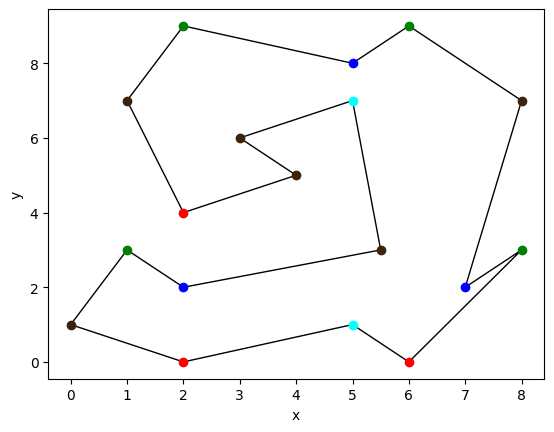

In [50]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [45]:
def below(first, second):
    return first[1] < second[1]
def above(first, second):
    return first[1] > second[1]
def angle(a,b,c):
    return (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

In [46]:
E = 1e-18
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    color = [ 4 for _ in range(n) ]
    for current_i, current_point in enumerate(polygon):
        previous_i = (current_i-1+n)%n
        next_i = (current_i+1)%n
        previous_point = polygon[previous_i]
        next_point = polygon[next_i]
        if angle(previous_point,current_point,next_point) > E:
            if below(current_point,previous_point) and below(current_point,next_point):
                color[current_i] = 1
            elif above(current_point,previous_point) and above(current_point,next_point):
                color[current_i] = 0
        elif angle(previous_point,current_point,next_point) < -E:
            if below(current_point,previous_point) and below(current_point,next_point):
                color[current_i] = 2
            elif above(current_point,previous_point) and above(current_point,next_point):
                color[current_i] = 3
        else:
            color[current_i] = 4
    return color

Przeprowadź test poprawności powyższej funkcji. 

In [47]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s



Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

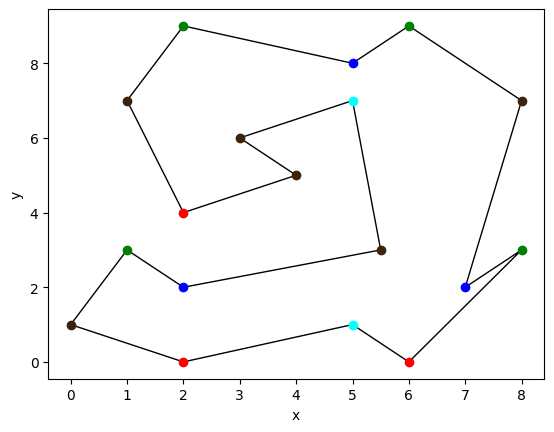

In [49]:
colors = color_vertex(polygon_example_2)
draw_polygon_colors(polygon_example_2,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

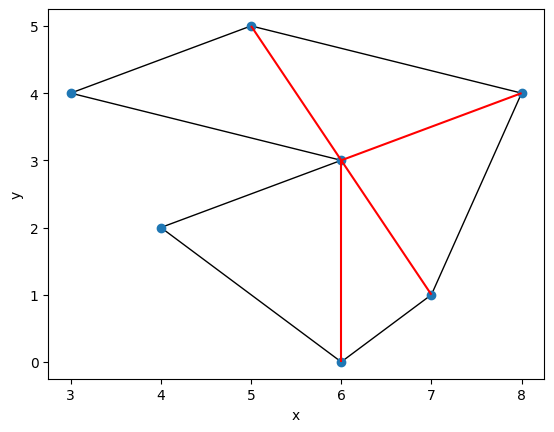

In [19]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [69]:

def previous_p(index, n):
    return (index + n - 1) % n

def next_p(index, n):
    return (index + 1) % n

def is_y_monotonic(polygon):
    n = len(polygon)
    min_index = get_min_index(polygon)
    max_index = get_max_index(polygon)
    # Top to bottom
    i = max_index
    while min_index != i:
        j = next_p(i,n)
        if polygon[i][1] < polygon[j][1]:
            return False
        i = next_p(i,n)
    # Bottom to top - left
    i = min_index
    while max_index != i:
        j = next_p(i,n)
        if polygon[i][1] > polygon[j][1]:
            return False
        i = next_p(i,n)
    return True

def det(a,b,c):
    return (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

def get_max_index(points):
    return max(range(len(points)), key=lambda i: (points[i][1], -points[i][0]))

def get_min_index(points):
    return min(range(len(points)), key=lambda i: (points[i][1], points[i][0]))

def divide(polygon):
    n = len(polygon)
    left_right = [1] * n
    min_index = get_min_index(polygon)
    max_index = get_max_index(polygon)
    left_right[max_index] = 0
    left_right[min_index] = 1 # Some problem may arise here, but it passes the tests
    i = max_index
    while i != min_index:
        left_right[i] = -1
        i = next_p(i, n)
    i = min_index
    while i != max_index:
        left_right[i] = 1 
        i = next_p(i, n)
    return left_right

def check_if_inside(a, b, c, side, epsilon=1e-18):
    d = det(a, b, c)
    return side * d > epsilon

def build_events(polygon):
    n = len(polygon)
    starter = get_max_index(polygon)
    end = get_min_index(polygon)
    left = previous_p(starter, n)
    right = next_p(starter, n)
    result = [starter]

    while left != end or right != end:
        if polygon[left][1] > polygon[right][1]:
            result.append(left)
            left = previous_p(left, n)
        elif polygon[left][1] < polygon[right][1]:
            result.append(right)
            right = next_p(right, n)
        else:
            result.append(left)
            left = previous_p(left, n)
            result.append(right)
            right = next_p(right, n)

    result.append(end)
    return starter, result[1], result[2:]
    # a = sorted(range(len(polygon)), key=lambda i: (polygon[i][1],polygon[i][0]), reverse=True)
    # return a[0], a[1], a[2:]

def draw_polygon_other(triangles, polygon, save_steps, step):
    """Visualize the current state of the triangulation."""
    fig, ax = plt.subplots()
    x, y = zip(*polygon)
    ax.plot(x + (x[0],), y + (y[0],), 'k-', label="Polygon")  # Polygon edges

    # Draw triangles
    for triangle in triangles:
        x_tri = [polygon[triangle[0]][0], polygon[triangle[1]][0], polygon[triangle[2]][0]]
        y_tri = [polygon[triangle[0]][1], polygon[triangle[1]][1], polygon[triangle[2]][1]]
        ax.fill(x_tri + [x_tri[0]], y_tri + [y_tri[0]], alpha=0.3, color="blue")

    # Scatter plot vertices
    ax.scatter(x, y, color='red', zorder=5)

    ax.set_title(f"Triangulation Step {step}")
    plt.axis("equal")
    if save_steps:
        plt.savefig(f"step_{step}.png")
    # plt.close(fig)  # Close to save memory for animations
def triangulation(polygon):
    """
    Perform triangulation of a monotone polygon.
    :param polygon: List of vertices (x, y) in counter-clockwise order.
    :return: List of diagonals [(i, j), ...], where i, j are vertex indices.
    """
    print(len(polygon))
    # if not is_y_monotonic(polygon):
    #     print("Not monotonic!")
    #     return []
    n = len(polygon)
    triangulation_result = []
    left_right = divide(polygon)  # Determine left/right chains
    start, second, events = build_events(polygon)  # Sorted vertices by y-coordinate
    stack = [start, second]

    for i, event in enumerate(events):
        # print(f"Stos:\n{stack}\Aktualny punkt:\n{event}\nPo stronie {'prawej' if left_right[event] == 0 else 'lewej'}")
        current_chain = left_right[event]
        if left_right[stack[-1]] != current_chain: # and left_right[stack[-1]] != -1:
            last = stack[-1]
            while len(stack) >= 1:
                top = stack.pop()
                if abs(event-top) > 1 and abs(event-top) != n-1:
                    triangulation_result.append([event, top])
                    # print(f"Dodano przekątną z pierwszego warunku {[event,top]}")
                    # draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in triangulation_result])
            stack.append(last)
            stack.append(event)
        else:
            while len(stack) > 1 and check_if_inside(polygon[event], polygon[stack[-1]],polygon[stack[-2]],left_right[stack[-1]]):
                    # print(f"Sprawdzanie, czy punkt jest wewnątrz {event} -> {stack[-1]} -> {stack[-2]}")
                    if abs(event-stack[-2]) > 1 and abs(event-stack[-2]) != n-1:
                        triangulation_result.append([event,stack[-2]])
                        # print(f"Dodano przekątną z drugiego warunku {[event,stack[-2]]}")
                        # draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in triangulation_result])
                    stack.pop()
            stack.append(event)

    draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in triangulation_result])
    return triangulation_result

def add_polygon(polygon):
    n = len(polygon)
    return [ (i,(i+1)%n) for i in range(n) ]

def full_triangulation(polygon):
    t = triangulation(polygon)
    print(t + add_polygon(polygon))
    return t

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ:

Można do tego używać tablicy krotek. Dla triangulacji należy przechowywać 2 indeksy punktów, które są znalezioną przekątną.
Do przechowywania rozważania punktów w algorytmie używam tablicy po indeksach z tablicy wielokąta.

Przeprowadź testy poprawności powyższej funkcji.


Lab 3, task 3:
	Test 1: 6
[[0, 4], [0, 3], [0, 2], (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0)]
Passed
	Test 2: 8
[[7, 1], [2, 7], [6, 2], [3, 6], [5, 3], (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 0)]
Passed
	Test 3: 18
[[1, 17], [16, 1], [2, 16], [15, 2], [3, 15], [14, 3], [4, 14], [13, 4], [5, 13], [12, 5], [6, 12], [11, 6], [7, 11], [8, 11], [10, 8], (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 0)]
Passed
	Test 4: 10
[[3, 5], [6, 3], [2, 6], [1, 6], [7, 1], [0, 7], [8, 0], (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 0)]
Passed
	Test 5: 6
[[1, 5], [4, 1], [2, 4], (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0)]
Passed
	Test 6: 9
[[5, 7], [3, 5], [3, 7], [1, 3], [1, 7], [8, 1], (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 0)]
Passed
	Test 7: 12
[[3, 1], [0, 4], [0, 3], [5, 0], [6, 0], [7, 0], [9, 7], [

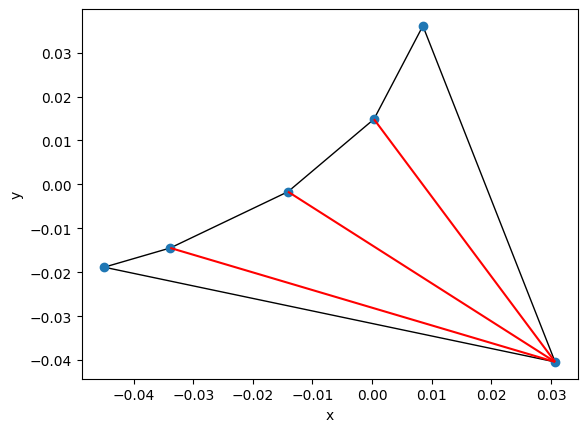

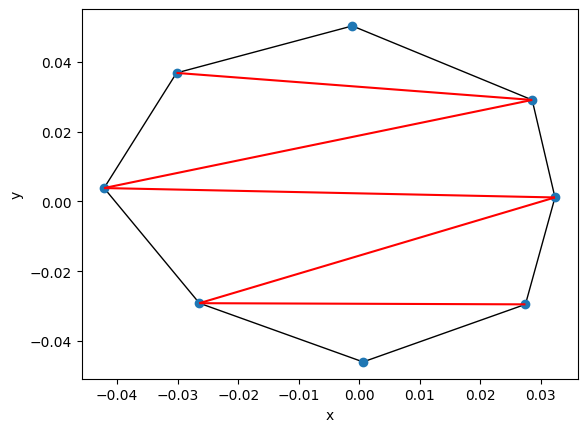

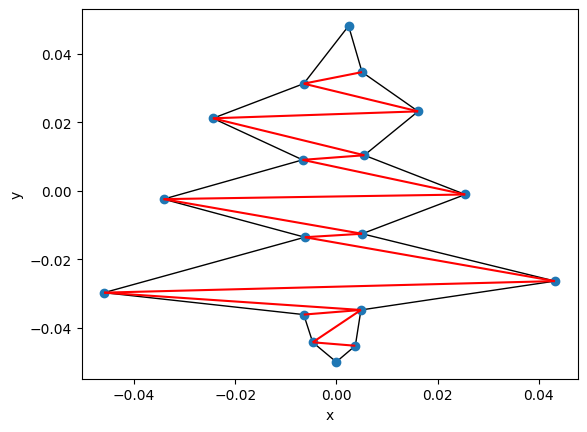

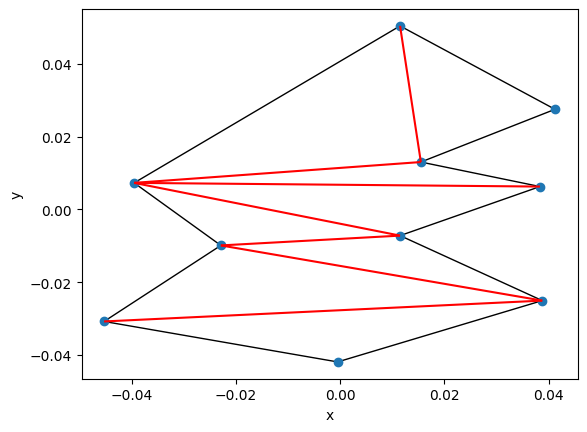

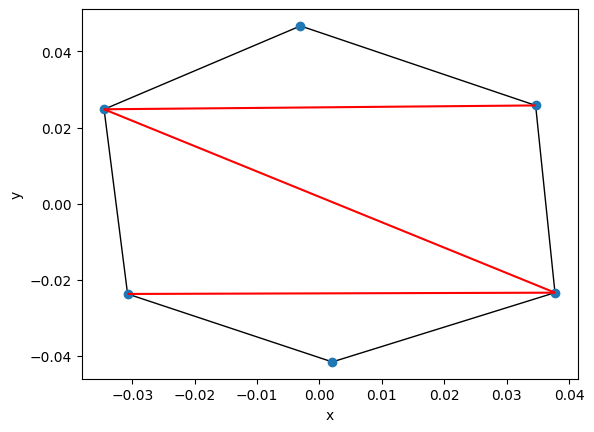

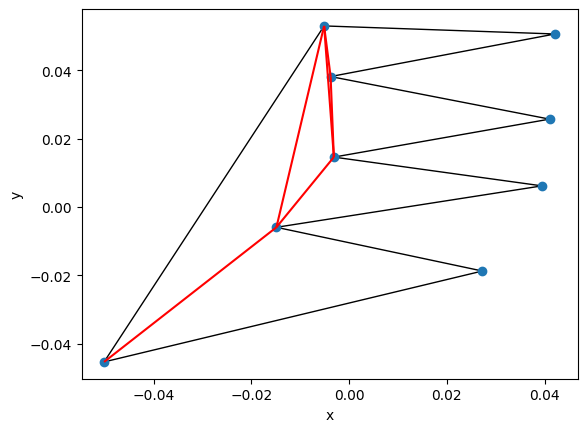

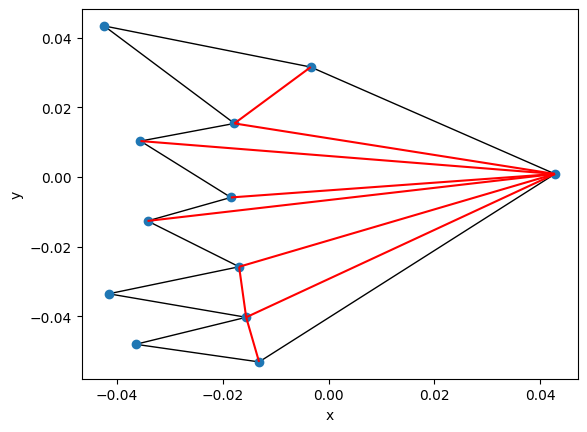

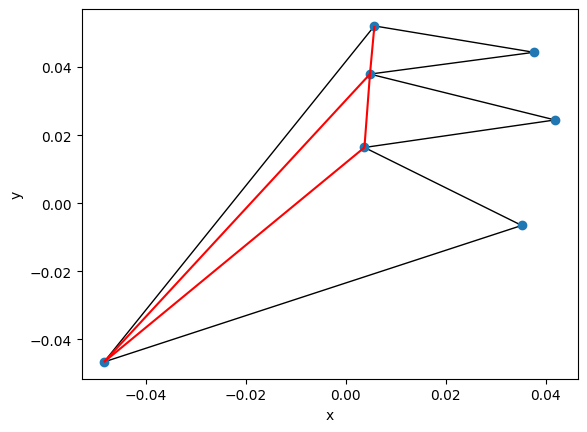

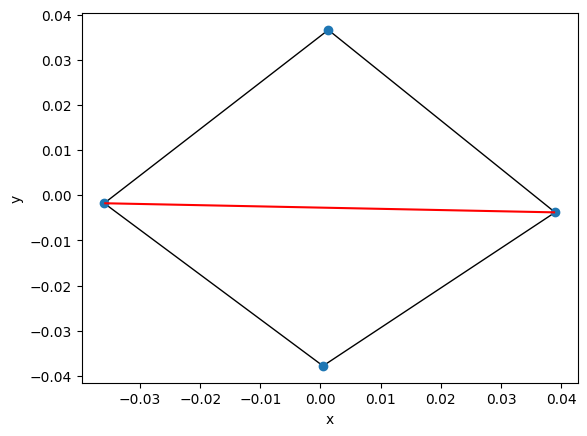

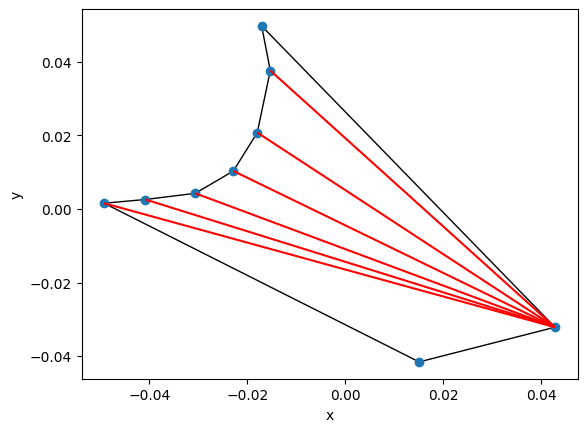

In [70]:
Test().runtest(3, full_triangulation)


Zwizualizuj powstały wielokąt podzielony na trójkąty.

18


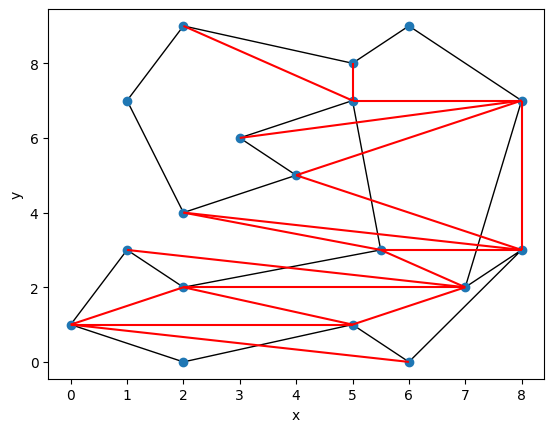

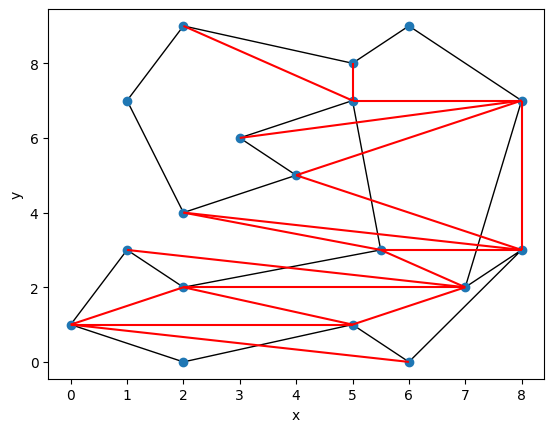

In [66]:
def convert_to_float32(table):
    """
    Converts a list of tuples containing float64 values to float32.
    :param table: List of tuples [(float64, flot64), ...]
    :return: List of tuples [(float32, float32), ...]
    """
    return [(np.float32(x), np.float32(y)) for x, y in table]

polygon = polygon_example_2

tri = triangulation(convert_to_float32(polygon))
visualizer = Visualizer()
draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])


In [118]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Helper function for drawing the polygon and current triangulation
def draw_polygon(triangles, polygon, save_steps, step):
    """Visualize the current state of the triangulation."""
    fig, ax = plt.subplots()
    x, y = zip(*polygon)
    ax.plot(x + (x[0],), y + (y[0],), 'k-', label="Polygon")  # Polygon edges

    # Draw triangles
    for triangle in triangles:
        x_tri = [polygon[triangle[0]][0], polygon[triangle[1]][0], polygon[triangle[2]][0]]
        y_tri = [polygon[triangle[0]][1], polygon[triangle[1]][1], polygon[triangle[2]][1]]
        ax.fill(x_tri + [x_tri[0]], y_tri + [y_tri[0]], alpha=0.3, color="blue")

    # Scatter plot vertices
    ax.scatter(x, y, color='red', zorder=5)

    ax.set_title(f"Triangulation Step {step}")
    plt.axis("equal")
    if save_steps:
        plt.savefig(f"step_{step}.png")
    # plt.close(fig)  # Close to save memory for animations


def triangulation_with_visualization(polygon, save_steps=False):
    """
    Perform triangulation of a monotone polygon with step-by-step visualization.
    :param polygon: List of vertices [(x, y)] in counter-clockwise order.
    :param save_steps: If True, saves each step as an image file.
    :return: List of diagonals [(i, j)] where i, j are vertex indices.
    """
    if not is_y_monotonic(polygon):
        print("The polygon is not y-monotonic!")
        return []

    n = len(polygon)
    triangulation_result = []
    trinagles = []
    left_right = divide(polygon)  # Determine left/right chains
    start, second, events = build_events(polygon)  # Sorted vertices by y-coordinate
    stack = [start, second]

    step = 1  # Step counter for visualization
    for event in events:
        current_chain = left_right[event]
        if left_right[stack[-1]] != current_chain:
            # Chains differ
            last = stack[-1]
            while len(stack) > 1:
                top = stack.pop()
                if abs(event - top) > 2 and abs(event - top) != n - 1:
                    triangulation_result.append((event, top))
                    trinagles.append((event,stack[-1],top))
                    draw_polygon(triangles=[(a, b, c) for a, b, c in trinagles], polygon=polygon, save_steps=save_steps, step=step)
                    step += 1
            stack.pop()
            stack.append(last)
            stack.append(event)
        else:
            # Same chain
            while len(stack) > 2 and check_if_inside(
                polygon[event], polygon[stack[-1]], polygon[stack[-2]], left_right[event]
            ):
                if abs(event - stack[-2]) > 1 and abs(event - stack[-2]) != n - 1:
                    triangulation_result.append((event,stack[-2]))
                    trinagles.append((event,stack[-1],stack[-2]))
                    stack.pop()
                    draw_polygon(triangles=[(a, b, c) for a, b, c in trinagles], polygon=polygon, save_steps=save_steps, step=step)
                    step += 1
                else:
                    break
            stack.append(event)
        # draw_polygon(triangles=[(a, b, c) for a, b, c in triangulation_result], polygon=polygon, save_steps=save_steps, step=step)
        # step += 1
        # Visualize the current state


    return triangulation_result
